<a href="https://colab.research.google.com/github/rpasquini/urban-econometrics/blob/master/OLS_Departamentos_AMBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Ricardo Pasquini 2021
rpasquini@utdt.edu


# Introducción
En este notebook introduciremos algunas de las principales librerías con las que vamos a estar trabajando. Nuestro objetivo inicial es estimar un modelo de regresión simple utilizando datos de alquileres de 2019.
 

## Donde estamos

Nuestro ambiente de trabajo ahora es un *notebook* que permite correr codigo, procesar datos, imprimir gráficos, etc. Estos notebooks en general se conocen como "Jupyter notebooks" y tienen como particularidad que el  entorno visual en el que trabajan vive en el navegador. En este momento además, el notebook con el que trabajan "vive en la nube" de Google Colaboratory. Utiliza recursos de la nube de Google para procesar los datos, etc. Para trabajar con nuestros propios datos tendremos que hacerlos accesibles a Google Colab (subiendo los datos al Colab o subiendo los datos a otro servidor al cual las librerias que usemos puedan acceder)

Comentarios relacionados:

- Como dijimos el notebook es solo un entorno visual. En este notebook vamos a trabajar con librerias de análisis cuantitativo construidas sobre el lenguaje Python. Los notebooks de Colab tambien pueden correr código de R.
- Trabajar en la nube "Colab" es conveniente para una clase. También es posible (y a veces necesario) trabajar con un Jupyter Notebook instalado "localmente" en sus computadoras.

- El ambiente virtual provisto por Google Colab va a borrar todo el contenido que se aloje en la memoria virtual después de un rato de inactividad. Lo unico que se mantiene es lo que está escrito en el notebook (el codigo y el texto explicativo). Esto implica que el notebook debe contener todo el codigo desde la carga de los datos hasta su resultado final para que pueda ser reproducido en cualquier momento.  


# Librerías con las que vamos a trabajar

Vamos a arrancar con estas:

- Pandas: Una de las principales librerías para trabajar y manipular datos en Python en forma tabular (llamados **dataframes** y usualmente abreviados **df**) 
- Geopandas: Una libreria que busca ser similar a Pandas pero adaptada adicionalmente a  datos con una dimensión geográfica. A los objetos de geopandas los llamamos **geodataframes**.
- StatsModels: Una librería para procesamientos estadísticos.

Al respecto del uso de librerías, además debemos tener en cuenta:

- En general para usar las librerías tienen que estar *instaladas* y además *importadas * al ambiente de trabajo en el que estemos.
- Los Notebooks de Colab vienen con algunas librerías preinstaladas. Solo será necesario importarlas. Para las que no, será necesario instalarlas ( usando un comando de instalacion llamado *pip*).


## Instalamos e importamos geopandas

In [1]:
!pip install geopandas

Ahora importamos geopandas. Una vez importada, la libreria en cuestion vive en el nombre de la variable que lleva su nombre. Podemos ademas cambiar ese nombre al momento de la importacion usando ***as***

In [2]:
import geopandas as gpd

La fuente de los datos es Properati [properati.com.ar/data/
](https://properati.com.ar/data/). 
Fue descargada haciendo un pedido a su base de datos disponible en Google Big Query



El método GeoDataFrame.from_file me permite levantar datos desde un archivo y convertirlos en un **GeoDataFrame**

In [3]:
departamentos=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true")

In [4]:
departamentos

,bathrooms,bedrooms,country,created_on,currency,descriptio,developmen,end_date,index,l1,l2,l3,l4,l5,l6,lat,lon,operation,operation_,price,price_peri,rooms,start_date,surface_co,surface_to,title,type,type_i18n,geometry
0,1.0,1.0,Argentina,2019-09-26,ARS,b'CODIGO: 1819-CRI180 ubicado en: Av. Callao 1...,None,2019-10-10,0,Argentina,Capital Federal,Recoleta,None,None,None,-34.588601,-58.388285,Alquiler,Alquiler,18000,Mensual,NaN,2019-09-26,52,58,b'Recoleta. Av. Callao y Av. Alvear. Piso alto...,Departamento,Departamento,POINT (106827.294 104558.628)
1,3.0,NaN,Argentina,2019-09-26,ARS,b'Residencia de estudiantes y viajeros. Son do...,None,2019-11-04,1,Argentina,Capital Federal,Balvanera,None,None,None,-34.606939,-58.393496,Alquiler,Alquiler,45000,Mensual,NaN,2019-09-26,219,219,Departamento - Balvanera,Departamento,Departamento,POINT (106347.880 102524.692)
2,1.0,2.0,Argentina,2019-09-26,ARS,b'CODIGO: 1348-AF021227 ubicado en: Tacuari 26...,None,2019-09-28,2,Argentina,Capital Federal,Monserrat,None,None,None,-34.611352,-58.379205,Alquiler,Alquiler,18500,Mensual,NaN,2019-09-26,61,67,3 ambientes con patio 61 m2 propios bajas expe...,Departamento,Departamento,POINT (107658.254 102034.095)
3,NaN,NaN,Argentina,2019-09-26,ARS,b'Departamento de dos ambientes a 200 metros d...,None,2020-02-12,4,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,San Justo,None,None,-34.680777,-58.553166,Alquiler,Alquiler,11000,Mensual,NaN,2019-09-26,38,38,Departamento - San Justo,Departamento,Departamento,POINT (91709.240 94331.755)
4,1.0,1.0,Argentina,2019-09-26,ARS,b'CODIGO: 733-1600MARIANOA ubicado en: MARIANO...,None,2019-11-10,5,Argentina,Capital Federal,Villa Urquiza,None,None,None,-34.577983,-58.472185,Alquiler,Alquiler,18500,Mensual,NaN,2019-09-26,39,49,EXCELENTE DEPARTAMENTO 2 AMB CON PATIO 49 MTS ...,Departamento,Departamento,POINT (99129.692 105739.092)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50648,1.0,1.0,Argentina,2019-02-27,ARS,Corredor Responsable: Martin Macagno - CUCICBA...,None,2019-04-24,60856,Argentina,Capital Federal,Parque Chacabuco,None,None,None,-34.629564,-58.441308,Alquiler,Alquiler,17500,Mensual,2.0,2019-02-27,45,45,ALQUILER DEPARTAMENTO 2 AMB A ESTRENAR P CHACA...,Departamento,Departamento,POINT (101961.679 100016.721)
50649,1.0,NaN,Argentina,2019-02-27,ARS,b'**** ALQUILER DUE\xd1O DIRECTO DE DEPARTAMEN...,None,2019-03-29,60857,Argentina,Capital Federal,b'Villa Pueyrred\xf3n',None,None,None,-34.584267,-58.501282,Alquiler,Alquiler,11000,Mensual,NaN,2019-02-27,43,49,b'Carlos A Lopez 2700 1\xb0 - $ 11.000 - Dep...,Departamento,Departamento,POINT (96460.074 105041.354)
50650,2.0,4.0,Argentina,2019-02-27,ARS,b'Corredor Responsable: JAVIER HERNANDEZ - CUC...,None,2019-03-10,60858,Argentina,Capital Federal,b'Villa Pueyrred\xf3n',None,None,None,-34.578043,-58.511571,Alquiler,Alquiler,40000,Mensual,5.0,2019-02-27,150,150,Alquiler-Triplex c/ cochera - sin expensas.,Departamento,Departamento,POINT (95515.687 105731.369)
50651,1.0,1.0,Argentina,2019-02-27,ARS,b'Xintel (DIP-DIP-632) EN ALQUILER DEPARTAMENT...,None,2019-06-25,60859,Argentina,Bs.As. G.B.A. Zona Norte,b'General San Mart\xedn',Villa Bonich,None,None,-34.572468,-58.566003,Alquiler,Alquiler,4500,Mensual,2.0,2019-02-27,40,40,DEPARTAMENTO EN ALQUILER,Departamento,Departamento,POINT (90520.492 106346.015)


In [5]:
# Si cargan desde el ambiente de Colab:
#departamentos=gpd.read_file("zip://departamentos.zip!departamentos.shp")

In [6]:
departamentos.head()

,bathrooms,bedrooms,country,created_on,currency,descriptio,developmen,end_date,index,l1,l2,l3,l4,l5,l6,lat,lon,operation,operation_,price,price_peri,rooms,start_date,surface_co,surface_to,title,type,type_i18n,geometry
0,1.0,1.0,Argentina,2019-09-26,ARS,b'CODIGO: 1819-CRI180 ubicado en: Av. Callao 1...,None,2019-10-10,0,Argentina,Capital Federal,Recoleta,None,None,None,-34.588601,-58.388285,Alquiler,Alquiler,18000,Mensual,NaN,2019-09-26,52,58,b'Recoleta. Av. Callao y Av. Alvear. Piso alto...,Departamento,Departamento,POINT (106827.294 104558.628)
1,3.0,NaN,Argentina,2019-09-26,ARS,b'Residencia de estudiantes y viajeros. Son do...,None,2019-11-04,1,Argentina,Capital Federal,Balvanera,None,None,None,-34.606939,-58.393496,Alquiler,Alquiler,45000,Mensual,NaN,2019-09-26,219,219,Departamento - Balvanera,Departamento,Departamento,POINT (106347.880 102524.692)
2,1.0,2.0,Argentina,2019-09-26,ARS,b'CODIGO: 1348-AF021227 ubicado en: Tacuari 26...,None,2019-09-28,2,Argentina,Capital Federal,Monserrat,None,None,None,-34.611352,-58.379205,Alquiler,Alquiler,18500,Mensual,NaN,2019-09-26,61,67,3 ambientes con patio 61 m2 propios bajas expe...,Departamento,Departamento,POINT (107658.254 102034.095)
3,NaN,NaN,Argentina,2019-09-26,ARS,b'Departamento de dos ambientes a 200 metros d...,None,2020-02-12,4,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,San Justo,None,None,-34.680777,-58.553166,Alquiler,Alquiler,11000,Mensual,NaN,2019-09-26,38,38,Departamento - San Justo,Departamento,Departamento,POINT (91709.240 94331.755)
4,1.0,1.0,Argentina,2019-09-26,ARS,b'CODIGO: 733-1600MARIANOA ubicado en: MARIANO...,None,2019-11-10,5,Argentina,Capital Federal,Villa Urquiza,None,None,None,-34.577983,-58.472185,Alquiler,Alquiler,18500,Mensual,NaN,2019-09-26,39,49,EXCELENTE DEPARTAMENTO 2 AMB CON PATIO 49 MTS ...,Departamento,Departamento,POINT (99129.692 105739.092)


## Descripcion rápida de los datos


In [7]:
departamentos.columns

Index(['bathrooms', 'bedrooms', 'country', 'created_on', 'currency',
       'descriptio', 'developmen', 'end_date', 'index', 'l1', 'l2', 'l3', 'l4',
       'l5', 'l6', 'lat', 'lon', 'operation', 'operation_', 'price',
       'price_peri', 'rooms', 'start_date', 'surface_co', 'surface_to',
       'title', 'type', 'type_i18n', 'geometry'],
      dtype='object')

In [8]:
departamentos.shape

(50653, 29)

Puedo llamar a una columna en particular del dataframe si la escribo entre corchetes 

In [9]:
departamentos['l2']

0                 Capital Federal
1                 Capital Federal
2                 Capital Federal
3        Bs.As. G.B.A. Zona Oeste
4                 Capital Federal
                   ...           
50648             Capital Federal
50649             Capital Federal
50650             Capital Federal
50651    Bs.As. G.B.A. Zona Norte
50652    Bs.As. G.B.A. Zona Norte
Name: l2, Length: 50653, dtype: object

En algunos casos funcionará que solo escriba . y el nombre de la columna. (esto no sirve, por ejemplo si las columnas  tienen espacios en el nombre) 


In [10]:
departamentos.l2

0                 Capital Federal
1                 Capital Federal
2                 Capital Federal
3        Bs.As. G.B.A. Zona Oeste
4                 Capital Federal
                   ...           
50648             Capital Federal
50649             Capital Federal
50650             Capital Federal
50651    Bs.As. G.B.A. Zona Norte
50652    Bs.As. G.B.A. Zona Norte
Name: l2, Length: 50653, dtype: object

Luego puedo ver cuales son los valores unicos que toma la variable:

In [11]:
departamentos['l2'].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Oeste',
       'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Norte',
       'Buenos Aires Interior'], dtype=object)

In [12]:
departamentos.dtypes

bathrooms      float64
bedrooms       float64
country         object
created_on      object
currency        object
descriptio      object
developmen      object
end_date        object
index            int64
l1              object
l2              object
l3              object
l4              object
l5              object
l6              object
lat            float64
lon            float64
operation       object
operation_      object
price            int64
price_peri      object
rooms          float64
start_date      object
surface_co       int64
surface_to       int64
title           object
type            object
type_i18n       object
geometry      geometry
dtype: object

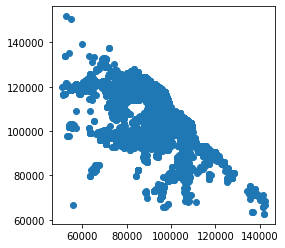

In [13]:
departamentos.plot()

In [14]:
departamentos.price.describe()

count    5.065300e+04
mean     1.780301e+04
std      1.713533e+04
min      5.000000e+01
25%      1.050000e+04
50%      1.500000e+04
75%      2.100000e+04
max      1.500000e+06
Name: price, dtype: float64

## Estudiando un subconjunto de datos (filas del dataframe)

Para "filtrar" el dataframe usamos el método .loc, especificando entre corchetes la condición que filtra nuestros datos

Por ejemplo, si queremos departamentos mayores a $100000
departamentos.loc[(departamentos.price>100000)]

Para escribir una condicion recuerden que pueden utilizar los siguientes lógicos:

```==    para chequear la  condicion "equivale a" o "igual a" va doble igual  ``` 

```!= distinto a ```

```> mayor a  ```

```>= mayor o igual a ```

```< menor a ```

```<= menor o igual a ```

En el caso de querer usar dos condiciones o más:

```(esta condicion) & (esta condicion) ``` Se cumple esta condicion Y esta otra  

```(esta condicion) | (esta condicion) ``` Se cumple esta condicion O esta otra
   

Recuerden que las condiciones tiene que ir  en parentesis!


Vean los siguientes ejemplos:






Filtrar los departamentos que estan en Capital Federal


In [15]:
departamentos.loc[departamentos['l2']=="Capital Federal"]

,bathrooms,bedrooms,country,created_on,currency,descriptio,developmen,end_date,index,l1,l2,l3,l4,l5,l6,lat,lon,operation,operation_,price,price_peri,rooms,start_date,surface_co,surface_to,title,type,type_i18n,geometry
0,1.0,1.0,Argentina,2019-09-26,ARS,b'CODIGO: 1819-CRI180 ubicado en: Av. Callao 1...,None,2019-10-10,0,Argentina,Capital Federal,Recoleta,None,None,None,-34.588601,-58.388285,Alquiler,Alquiler,18000,Mensual,NaN,2019-09-26,52,58,b'Recoleta. Av. Callao y Av. Alvear. Piso alto...,Departamento,Departamento,POINT (106827.294 104558.628)
1,3.0,NaN,Argentina,2019-09-26,ARS,b'Residencia de estudiantes y viajeros. Son do...,None,2019-11-04,1,Argentina,Capital Federal,Balvanera,None,None,None,-34.606939,-58.393496,Alquiler,Alquiler,45000,Mensual,NaN,2019-09-26,219,219,Departamento - Balvanera,Departamento,Departamento,POINT (106347.880 102524.692)
2,1.0,2.0,Argentina,2019-09-26,ARS,b'CODIGO: 1348-AF021227 ubicado en: Tacuari 26...,None,2019-09-28,2,Argentina,Capital Federal,Monserrat,None,None,None,-34.611352,-58.379205,Alquiler,Alquiler,18500,Mensual,NaN,2019-09-26,61,67,3 ambientes con patio 61 m2 propios bajas expe...,Departamento,Departamento,POINT (107658.254 102034.095)
4,1.0,1.0,Argentina,2019-09-26,ARS,b'CODIGO: 733-1600MARIANOA ubicado en: MARIANO...,None,2019-11-10,5,Argentina,Capital Federal,Villa Urquiza,None,None,None,-34.577983,-58.472185,Alquiler,Alquiler,18500,Mensual,NaN,2019-09-26,39,49,EXCELENTE DEPARTAMENTO 2 AMB CON PATIO 49 MTS ...,Departamento,Departamento,POINT (99129.692 105739.092)
5,NaN,NaN,Argentina,2019-09-26,ARS,b'MONOAMBIENTE EN ALMAGRO<br>AMPLIO Y LUMINOSO...,None,2019-10-02,6,Argentina,Capital Federal,Almagro,None,None,None,-34.611445,-58.420994,Alquiler,Alquiler,9000,Mensual,1.0,2019-09-26,30,30,Departamento - Almagro,Departamento,Departamento,POINT (103825.371 102026.223)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50638,1.0,NaN,Argentina,2019-02-27,ARS,b'ALQUILER EXCELENTE MONOAMBIENTE MUY LUMINOSO...,None,2019-03-16,60841,Argentina,Capital Federal,Villa Urquiza,None,None,None,-34.573382,-58.473540,Alquiler,Alquiler,12500,Mensual,1.0,2019-02-27,32,37,ALQUILER EXCELENTE MONOAMBIENTE MUY LUMINOSO A...,Departamento,Departamento,POINT (99005.286 106249.504)
50639,1.0,1.0,Argentina,2019-02-27,ARS,b'Monoambiente de 35m2 Totales en complejo Gre...,None,2019-07-17,60842,Argentina,Capital Federal,Villa Urquiza,None,None,None,-34.574489,-58.473084,Alquiler,Alquiler,15000,None,1.0,2019-02-27,27,32,Excelente departamento en Alquiler con cochera,Departamento,Departamento,POINT (99047.178 106126.635)
50648,1.0,1.0,Argentina,2019-02-27,ARS,Corredor Responsable: Martin Macagno - CUCICBA...,None,2019-04-24,60856,Argentina,Capital Federal,Parque Chacabuco,None,None,None,-34.629564,-58.441308,Alquiler,Alquiler,17500,Mensual,2.0,2019-02-27,45,45,ALQUILER DEPARTAMENTO 2 AMB A ESTRENAR P CHACA...,Departamento,Departamento,POINT (101961.679 100016.721)
50649,1.0,NaN,Argentina,2019-02-27,ARS,b'**** ALQUILER DUE\xd1O DIRECTO DE DEPARTAMEN...,None,2019-03-29,60857,Argentina,Capital Federal,b'Villa Pueyrred\xf3n',None,None,None,-34.584267,-58.501282,Alquiler,Alquiler,11000,Mensual,NaN,2019-02-27,43,49,b'Carlos A Lopez 2700 1\xb0 - $ 11.000 - Dep...,Departamento,Departamento,POINT (96460.074 105041.354)


Filtrar los departamentos que valen más de $100000 Y que además estan en capital federal

In [16]:
departamentos.loc[(departamentos.price>100000)&(departamentos.l2=="Capital Federal")]

,bathrooms,bedrooms,country,created_on,currency,descriptio,developmen,end_date,index,l1,l2,l3,l4,l5,l6,lat,lon,operation,operation_,price,price_peri,rooms,start_date,surface_co,surface_to,title,type,type_i18n,geometry
200,3.0,NaN,Argentina,2019-12-20,ARS,b'*** A ESTRENAR ***<br><br>Espectacular 4 amb...,None,2020-05-14,255,Argentina,Capital Federal,Belgrano,None,None,None,-34.564840,-58.437743,Alquiler,Alquiler,160000,Mensual,4.0,2019-12-20,130,149,Espectacular 158m2 - UNICO 3 Suites - Dependen...,Departamento,Departamento,POINT (102290.361 107196.883)
985,NaN,NaN,Argentina,2019-04-15,ARS,test test test test,None,2019-07-26,1210,Argentina,Capital Federal,Belgrano,None,None,None,-34.555387,-58.445545,Alquiler,Alquiler,1232134,Mensual,1.0,2019-04-15,123,123,Departamento alquiler,Departamento,Departamento,POINT (101574.557 108245.646)
1346,1.0,1.0,Argentina,2019-01-31,ARS,b'Corredor Responsable: JAVIER HERNANDEZ - CUC...,None,2019-08-07,1662,Argentina,Capital Federal,Puerto Madero,None,None,None,-34.609558,-58.362674,Alquiler,Alquiler,120000,None,2.0,2019-01-31,160,200,Alquiler Triplex Los Molinos. Expensas incluidas,Departamento,Departamento,POINT (109174.738 102231.768)
1621,2.0,3.0,Argentina,2019-03-08,ARS,b'ALQUILER 4 AMBIENTES EN PALERMO SIN MUEBLES ...,None,2019-04-30,1983,Argentina,Capital Federal,Palermo,None,None,None,-34.581219,-58.406424,Alquiler,Alquiler,139000,Mensual,4.0,2019-03-08,157,168,b'ALQUILER D\xdaPLEX EN PISO ALTO TORRE DE CAT...,Departamento,Departamento,POINT (105163.595 105378.695)
2260,2.0,NaN,Argentina,2019-05-09,ARS,b'PISO EN EDIFICIO DE ESTILO FRANC\xc9S DE 12 ...,None,2019-06-14,2757,Argentina,Capital Federal,Palermo,None,None,None,-34.574938,-58.419038,Alquiler,Alquiler,105000,Mensual,4.0,2019-05-09,161,168,Venta piso de 4 ambientes con cochera,Departamento,Departamento,POINT (104006.530 106075.998)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48649,3.0,3.0,Argentina,2019-07-31,ARS,b'Departamento \xfanico en piso alt\xedsimo co...,None,2019-08-14,58561,Argentina,Capital Federal,Palermo,Palermo Chico,None,None,-34.580420,-58.406067,Alquiler,Alquiler,119000,None,4.0,2019-07-31,157,157,ALQUILER TORRES BULNES GRAN RECEPCION 3 DORM. ...,Departamento,Departamento,POINT (105196.369 105467.289)
48742,4.0,3.0,Argentina,2019-07-31,ARS,b'Alquiler Departamento tipo duplex. Rodea de ...,None,2019-08-14,58665,Argentina,Capital Federal,Belgrano,None,None,None,-34.560822,-58.463434,Alquiler,Alquiler,130000,None,5.0,2019-07-31,242,396,Casa dentro de Edificio. Seguridad Coch Doble-...,Departamento,Departamento,POINT (99932.663 107642.892)
49168,3.0,4.0,Argentina,2019-07-31,ARS,b'Semipiso 5 amb c/dependencia y 2 cocheras cu...,None,2019-08-14,59165,Argentina,Capital Federal,b'Las Ca\xf1itas',None,None,None,-34.578066,-58.426532,Alquiler,Alquiler,107000,None,5.0,2019-07-31,190,200,Semipiso 5 ambientes con dependencia y 2 coche...,Departamento,Departamento,POINT (103318.736 105729.364)
49795,3.0,3.0,Argentina,2019-08-01,ARS,b'Planta de categor\xeda en el Palacio Bellini...,None,2019-08-14,59894,Argentina,Capital Federal,Palermo,Palermo Chico,None,None,-34.580355,-58.413138,Alquiler,Alquiler,115000,None,4.0,2019-08-01,145,155,PALACIO BELLINI - PALERMO (APTO PROFESIONAL CO...,Departamento,Departamento,POINT (104547.555 105474.833)


Es posible combinar los filtros con otros metodos para describir o graficar los datos en una sola linea de codigo. Para eso filtro primero y grafico o describo despues.


In [17]:
departamentos.loc[departamentos['l2']=="Capital Federal"].price.describe()

count    3.347200e+04
mean     1.855286e+04
std      1.733385e+04
min      5.000000e+01
25%      1.150000e+04
50%      1.500000e+04
75%      2.200000e+04
max      1.232134e+06
Name: price, dtype: float64

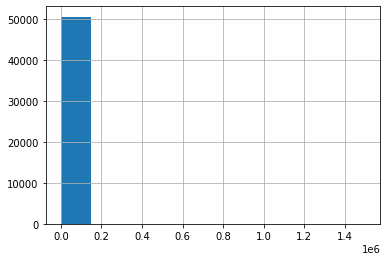

In [18]:
departamentos.price.hist()

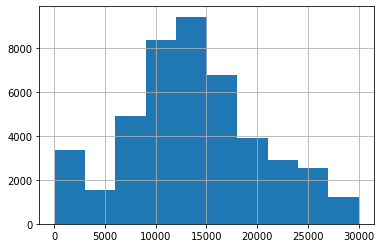

In [19]:
departamentos.price.loc[departamentos.price<30000].hist()

El método plot() en el GeoDataFrame permite mapear los datos. Podrán reconocer el AMBA


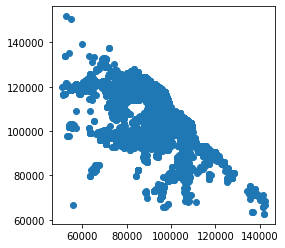

In [20]:
departamentos.plot()

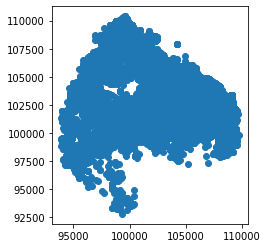

In [21]:
departamentos.loc[departamentos.l2=="Capital Federal"].plot()

# OLS 

Statsmodels es la librería de operaciones estadísticas que usaremos para estimar OLS

In [22]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Nuestro modelo a explorar es el siguiente:

$price_i=\beta_0+ \beta_1*bedrooms_i+\epsilon_i$

Estimar la regresion va a requerir varios pasos:

1. Asegurarme de que los datos (las filas en cuestion) que voy a estar usando no tienen datos missing en ninguna variable. 
2. Separar a la variable a explicar (dependiente) de la(s) explicativas
3. Si la regresión va a tener una constante, como en nuestro caso, agregar a las variables explicativas una columna de 1s (unos).


4. Asignar a una variable el nombre del modelo y las especificaciones del mismo
5. Correr el modelo con el metodo fit() y guardar los resultados en otra variable
6. Imprimir los resultados en pantalla (imprimir los contenidos de la variable del paso anterior)

### 1. Asegurarme de que los datos (las filas en cuestion) que voy a estar usando no tienen datos missing en ninguna variable

Me quedo primero solo con los datos que me interesan en uno dataframe.
Luego el metodo dropna() me permite eliminar los missing.
El resultado lo guardo bajo el el mismo nombre de dataframe datos solo para comodidad

In [23]:
datos=departamentos[['price', 'bedrooms']]

In [24]:
# el metodo dropna() me permite eliminar las filas que tienen algun valor missing
datos=datos.dropna()

In [25]:
datos

,price,bedrooms
0,18000,1.0
2,18500,2.0
4,18500,1.0
43,15000,1.0
45,13000,1.0
...,...,...
50647,10500,2.0
50648,17500,1.0
50650,40000,4.0
50651,4500,1.0


2. Separar a la variable a explicar (dependiente) de la(s) explicativas

In [26]:
Y=datos.price
X=datos.bedrooms

3. Si la regresión va a tener una constante, como en nuestro caso, agregar a las variables explicativas una columna de 1s (unos). En terminos de nuestra ecuacion equivale a :

$price_i=\beta_0*1+ \beta_1*bedrooms_i+\epsilon_i$

Si bien podriamos definir una variable de 1s, uso directamente un método de sm que sirve para eso.


In [27]:
X=sm.add_constant(X)

In [28]:
X

,const,bedrooms
0,1.0,1.0
2,1.0,2.0
4,1.0,1.0
43,1.0,1.0
45,1.0,1.0
...,...,...
50647,1.0,2.0
50648,1.0,1.0
50650,1.0,4.0
50651,1.0,1.0


4. Asignar a una variable el nombre del modelo y las especificaciones del mismo
En este caso guardo bajo el nombre modelo al metodo OLS donde especifico cuales son las variables en cuestion.

In [29]:
modelo=sm.OLS(Y,X)

5. Correr el modelo con el metodo fit() y guardar los resultados en otra variable

In [30]:
resultados=modelo.fit()

Imprimir los resultados en pantalla (imprimir los contenidos de la variable del paso anterior)

In [31]:
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          7.68e-308
Time:                        14:47:54   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    205.145     56.088      0.000    1.11e+04    1.19e+04
bedrooms    4253.5067    111.984     37.983      0.000    4034.013    4473.000
==============================================================================
Omnibus:                    39834.368   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         59814269.062
Skew:                           7.918   Prob(JB):                         0.00
Kurtosis:                     229.365   Cond. No.                         5.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Si usamos print de la siguiente forma, los resultados se imprimen mejor:

In [33]:
# mostramos los resultados
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          7.68e-308
Time:                        14:48:09   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    205.145     56.088      0.0

Nuestro resultado es:
precio= 11500+ 4253* bedrooms

## Graficando

El (geo)dataframe tiene algunos metodos que permiten graficar directamente

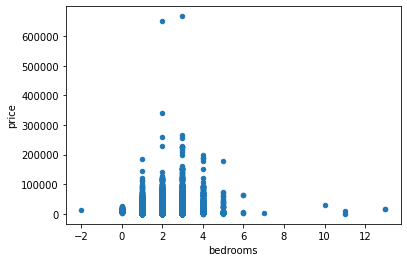

In [34]:
datos.plot.scatter(x='bedrooms',  y='price')

Scatter plot 


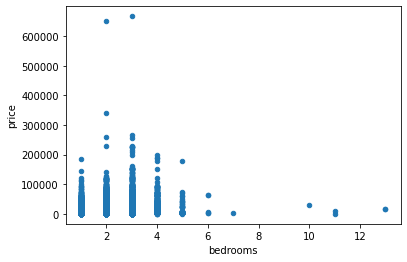

In [36]:
datos.loc[datos['bedrooms']>0].plot.scatter(x='bedrooms',  y='price')

Para hacer otros graficos más complejos vamos a usar otras librerias como matplotlib

In [38]:
ypred = resultados.predict(X)

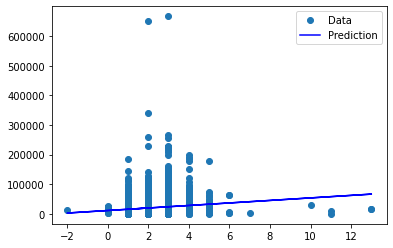

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(datos['bedrooms'], datos['price'], 'o', label="Data")
ax.plot(datos['bedrooms'], ypred, 'b-', label="Prediction")
#ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

# Ejemplo de ploteo con layers (capas)


In [51]:
limites=gpd.read_file("zip:///content/ign_departamento.zip")

#limites=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true")

(-35.0, -34.1)

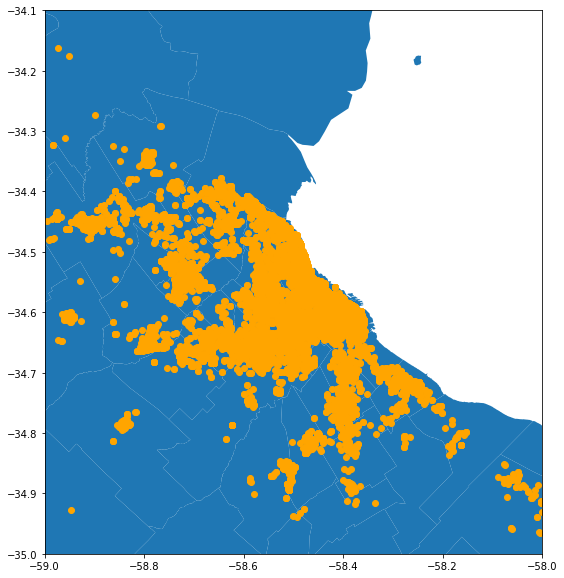

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))
limites.to_crs("EPSG:4326").plot(ax=ax)
departamentos.to_crs("EPSG:4326").plot(ax=ax,color='orange')
ax.set_xlim(-59, -58)
ax.set_ylim(-35, -34.1)